#E-commerce data analysis project


---



## Import Libs and data sets

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the main dataset
df = pd.read_csv('ecommerce_transactions.csv')

# Load the sublemental dataset
country_code = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/refs/heads/master/all/all.csv')



## Check the main dataset

In [ ]:
# Display dataset info
df.info()

# Display 10 random samples from the dataset
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    50000 non-null  int64  
 1   User_Name         50000 non-null  object 
 2   Age               50000 non-null  int64  
 3   Country           50000 non-null  object 
 4   Product_Category  50000 non-null  object 
 5   Purchase_Amount   50000 non-null  float64
 6   Payment_Method    50000 non-null  object 
 7   Transaction_Date  50000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.1+ MB


,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date
43992,43993,Sophia Clark,58,Australia,Clothing,317.78,UPI,2023-06-15
23821,23822,Isabella Rodriguez,54,Brazil,Toys,349.12,Debit Card,2024-05-20
30152,30153,James Rodriguez,41,USA,Beauty,309.99,Cash on Delivery,2025-03-06
26840,26841,Elijah Walker,46,Germany,Beauty,856.99,Debit Card,2023-11-13
4481,4482,Noah Walker,54,Mexico,Books,337.49,Net Banking,2023-08-05
4892,4893,Liam Thompson,59,Japan,Books,870.89,Debit Card,2024-09-17
502,503,Elijah Walker,66,UK,Electronics,691.28,Debit Card,2023-07-29
27282,27283,Oliver Clark,62,USA,Sports,232.51,Cash on Delivery,2024-01-22
11293,11294,Sophia Harris,67,Japan,Electronics,797.40,UPI,2024-09-14
29923,29924,Liam Harris,60,Mexico,Sports,542.59,Net Banking,2023-04-05


## Change columns' types

In [ ]:
df["User_Name"] = df["User_Name"].astype('str')
df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"], format="%Y-%m-%d")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    50000 non-null  int64         
 1   User_Name         50000 non-null  object        
 2   Age               50000 non-null  int64         
 3   Country           50000 non-null  object        
 4   Product_Category  50000 non-null  object        
 5   Purchase_Amount   50000 non-null  float64       
 6   Payment_Method    50000 non-null  object        
 7   Transaction_Date  50000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 3.1+ MB


## Add numeric columns to describe the features of the dataset

In [ ]:
# One-hot encode "Product_Category" with 1s and 0s
df = df.join(pd.get_dummies(df["Product_Category"]).astype(int))

# One-hot encode "Payment_Method" with 1s and 0s
df = df.join(pd.get_dummies(df["Payment_Method"]).astype(int))

# Display sample rows to verify
df.sample(5)


,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date,Beauty,Books,...,Grocery,Home & Kitchen,Sports,Toys,Cash on Delivery,Credit Card,Debit Card,Net Banking,PayPal,UPI
19919,19920,Elijah Harris,35,Australia,Sports,604.91,PayPal,2023-08-02,0,0,...,0,0,1,0,0,0,0,0,1,0
11552,11553,Liam Rodriguez,67,Germany,Beauty,534.72,Credit Card,2024-05-12,1,0,...,0,0,0,0,0,1,0,0,0,0
14410,14411,Isabella Hall,37,Germany,Clothing,311.76,Net Banking,2023-10-24,0,0,...,0,0,0,0,0,0,0,1,0,0
33734,33735,Oliver Thompson,58,Mexico,Books,835.19,Net Banking,2023-10-12,0,1,...,0,0,0,0,0,0,0,1,0,0
48309,48310,James Harris,53,India,Sports,198.63,UPI,2024-11-23,0,0,...,0,0,1,0,0,0,0,0,0,1


## Add a numeric code for each country

### In this section, the supplemental dataset is used. The country_code column contains internationally recognized country codes, extracted from a raw file on GitHub. This column will be added to the DataFrame using a left join

In [ ]:
# Merge df with country_code to add 'country-code' next to 'Country'
df_merged = df.merge(country_code[['name', 'country-code']],
                      left_on='Country',
                      right_on='name',
                      how='left')

# Drop the redundant 'name' column from country_code
df_merged.drop(columns=['name'], inplace=True)

df = df_merged

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    50000 non-null  int64         
 1   User_Name         50000 non-null  object        
 2   Age               50000 non-null  int64         
 3   Country           50000 non-null  object        
 4   Product_Category  50000 non-null  object        
 5   Purchase_Amount   50000 non-null  float64       
 6   Payment_Method    50000 non-null  object        
 7   Transaction_Date  50000 non-null  datetime64[ns]
 8   Beauty            50000 non-null  int64         
 9   Books             50000 non-null  int64         
 10  Clothing          50000 non-null  int64         
 11  Electronics       50000 non-null  int64         
 12  Grocery           50000 non-null  int64         
 13  Home & Kitchen    50000 non-null  int64         
 14  Sports            5000

At this stage, there are missing values in the country_code column. An investigation is conducted to identify which countries are missing from the country_code table

In [ ]:
# Display rows where "country-code" is null
df_null_countries = df[df["country-code"].isna()]

# Print unique countries
df_null_countries["Country"].unique()



array(['USA', 'UK'], dtype=object)

USA" and "UK" are missing from the country_code table, possibly due to the use of short names. In this case, the missing country names in country_code will be corrected and replaced with the full names from the df

Identifying missing countries in the country_code table, starting with 'United States' and 'United Kingdom' in the search

In [ ]:
# Filter rows where the "name" column contains 'United States' or 'United Kingdom' (case-insensitive)
df_missing_countries = country_code[country_code["name"].str.contains("United States|United Kingdom", case=False, na=False)]

# Print the result
df_missing_countries

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
234,United Kingdom of Great Britain and Northern I...,GB,GBR,826,ISO 3166-2:GB,Europe,Northern Europe,NaN,150.0,154.0,NaN
235,United States of America,US,USA,840,ISO 3166-2:US,Americas,Northern America,NaN,19.0,21.0,NaN
236,United States Minor Outlying Islands,UM,UMI,581,ISO 3166-2:UM,Oceania,Micronesia,NaN,9.0,57.0,NaN


The missing countries have been identified, and the issue is due to the use of short names in the DataFrame. At this stage, the country names in the country_code table will be updated to match those in the DataFrame

In [ ]:
# Define the mapping of old names to new names
country_name_fix = {
    "United States of America": "USA",
    "United Kingdom of Great Britain and Northern Ireland": "UK"
}

# Apply the changes to the "name" column
country_code["name"] = country_code["name"].replace(country_name_fix)


Next, the merging process will be conducted again to integrate the updated country_code table. After merging, the country_code column will be checked for any remaining missing values

In [ ]:
# Merge df with country_code to add 'country-code' next to 'Country'
df_merged = df.merge(country_code[['name', 'country-code']],
                      left_on='Country',
                      right_on='name',
                      how='left',
                      suffixes=('', '_new'))  # Add suffix to avoid conflicts

# If "country-code_new" exists, replace the old "country-code" with it
if "country-code_new" in df_merged.columns:
    df_merged["country-code"] = df_merged["country-code_new"]
    df_merged.drop(columns=["country-code_new"], inplace=True)  # Drop temporary column

# Drop the redundant 'name' column from country_code
df_merged.drop(columns=['name'], inplace=True)

# Update df with the merged result
df = df_merged

# Display dataframe info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    50000 non-null  int64         
 1   User_Name         50000 non-null  object        
 2   Age               50000 non-null  int64         
 3   Country           50000 non-null  object        
 4   Product_Category  50000 non-null  object        
 5   Purchase_Amount   50000 non-null  float64       
 6   Payment_Method    50000 non-null  object        
 7   Transaction_Date  50000 non-null  datetime64[ns]
 8   Beauty            50000 non-null  int64         
 9   Books             50000 non-null  int64         
 10  Clothing          50000 non-null  int64         
 11  Electronics       50000 non-null  int64         
 12  Grocery           50000 non-null  int64         
 13  Home & Kitchen    50000 non-null  int64         
 14  Sports            5000

# Check for the correlation

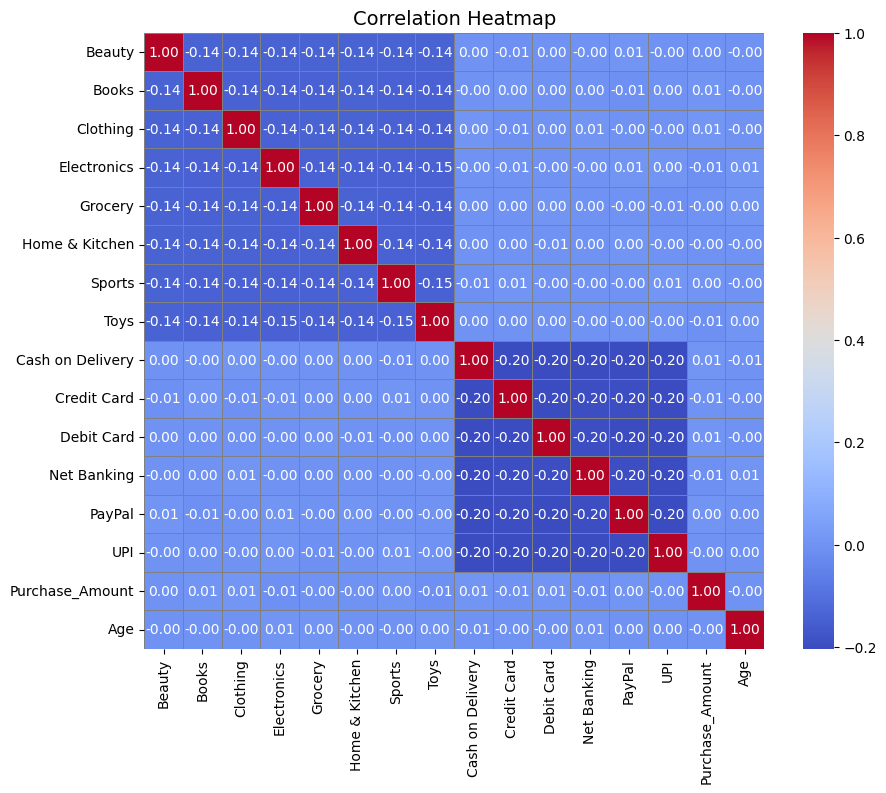

In [ ]:
# Select only the relevant numeric columns for correlation
correlation_matrix = df[[
    "Beauty", "Books", "Clothing", "Electronics", "Grocery", "Home & Kitchen",
    "Sports", "Toys", "Cash on Delivery", "Credit Card", "Debit Card",
    "Net Banking", "PayPal", "UPI", "Purchase_Amount", "Age"
]].corr()

# Set figure size
plt.figure(figsize=(10, 8))

# Draw heatmap with warm colors
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor="gray")

# Set title
plt.title("Correlation Heatmap", fontsize=14)

# Show the plot
plt.show()

## Correlation table

In [ ]:
 df[[
    "Beauty", "Books", "Clothing", "Electronics", "Grocery", "Home & Kitchen",
    "Sports", "Toys", "Cash on Delivery", "Credit Card", "Debit Card",
    "Net Banking", "PayPal", "UPI", "Purchase_Amount", "Age"
]].corr()

,Beauty,Books,Clothing,Electronics,Grocery,Home & Kitchen,Sports,Toys,Cash on Delivery,Credit Card,Debit Card,Net Banking,PayPal,UPI,Purchase_Amount,Age
Beauty,1.000000,-0.140601,-0.140228,-0.141460,-0.140112,-0.140035,-0.141358,-0.142381,0.002333,-0.006852,0.002276,-0.003003,0.005546,-0.000319,0.000148,-0.000986
Books,-0.140601,1.000000,-0.142556,-0.143809,-0.142439,-0.142360,-0.143705,-0.144746,-0.000606,0.004670,0.000830,0.000451,-0.007614,0.002234,0.007520,-0.004914
Clothing,-0.140228,-0.142556,1.000000,-0.143428,-0.142061,-0.141983,-0.143324,-0.144362,0.003581,-0.006254,0.000807,0.005161,-0.000320,-0.002941,0.008363,-0.002966
Electronics,-0.141460,-0.143809,-0.143428,1.000000,-0.143310,-0.143231,-0.144584,-0.145631,-0.000974,-0.005397,-0.002432,-0.003124,0.007978,0.003931,-0.009662,0.005726
Grocery,-0.140112,-0.142439,-0.142061,-0.143310,1.000000,-0.141865,-0.143206,-0.144242,0.003020,0.001477,0.004139,0.001962,-0.002201,-0.008351,-0.000753,0.004043
Home & Kitchen,-0.140035,-0.142360,-0.141983,-0.143231,-0.141865,1.000000,-0.143127,-0.144163,0.001403,0.003106,-0.005612,0.000320,0.004005,-0.003180,-0.003211,-0.002887
Sports,-0.141358,-0.143705,-0.143324,-0.144584,-0.143206,-0.143127,1.000000,-0.145525,-0.010245,0.006624,-0.003024,-0.001447,-0.004296,0.012336,0.004075,-0.001552
Toys,-0.142381,-0.144746,-0.144362,-0.145631,-0.144242,-0.144163,-0.145525,1.000000,0.001567,0.002518,0.003034,-0.000318,-0.003014,-0.003783,-0.006384,0.003466
Cash on Delivery,0.002333,-0.000606,0.003581,-0.000974,0.003020,0.001403,-0.010245,0.001567,1.000000,-0.201109,-0.201762,-0.199132,-0.200238,-0.203528,0.006080,-0.005431
Credit Card,-0.006852,0.004670,-0.006254,-0.005397,0.001477,0.003106,0.006624,0.002518,-0.201109,1.000000,-0.199975,-0.197369,-0.198465,-0.201726,-0.005758,-0.000274


# **Prediction models**

## Testing the dataset using a Logistic Regression model




In [ ]:
# Define features (X) and target variable (y)
X = df[[
    "Beauty", "Books", "Clothing", "Electronics", "Grocery", "Home & Kitchen",
    "Sports", "Toys", "Cash on Delivery", "Credit Card", "Debit Card",
    "Net Banking", "PayPal", "UPI", "Age"
]]

# Convert Purchase_Amount into a binary variable (above median = 1, below median = 0)
y = (df["Purchase_Amount"] > df["Purchase_Amount"].median()).astype(int)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant for the intercept in training and testing sets
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the logistic regression model using training data
model = sm.Logit(y_train, X_train).fit()

# Display the regression results
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.693005
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:        Purchase_Amount   No. Observations:                40000
Model:                          Logit   Df Residuals:                    39986
Method:                           MLE   Df Model:                           13
Date:                Sun, 23 Mar 2025   Pseudo R-squ.:               0.0001963
Time:                        05:27:06   Log-Likelihood:                -27720.
converged:                       True   LL-Null:                       -27726.
Covariance Type:            nonrobust   LLR p-value:                    0.6204
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0010   6.14e+05   1.58e-09      1.000    -1.2e+06     1.2e+06
Beauty     

## Testing the dataset using a Linear Regression model

In [ ]:
# Define dependent variable (target)
y = df["Purchase_Amount"]

# Define independent variables (predictors)
X = df[[
    "Beauty", "Books", "Clothing", "Electronics", "Grocery", "Home & Kitchen",
    "Sports", "Toys", "Cash on Delivery", "Credit Card", "Debit Card",
    "Net Banking", "PayPal", "UPI", "Age"
]]

# Add a constant for the intercept
X = sm.add_constant(X)

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the OLS regression model
model = sm.OLS(y_train, X_train).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.454
Date:                Sun, 23 Mar 2025   Prob (F-statistic):              0.126
Time:                        06:07:13   Log-Likelihood:            -2.8303e+05
No. Observations:               40000   AIC:                         5.661e+05
Df Residuals:                   39986   BIC:                         5.662e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              393.0025      3.389  

## Testing the dataset using a Random Forest model

In [ ]:
# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate performance
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R²):", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 0.5004856277687583
Mean Squared Error (MSE): 0.2676863389512165
R-squared (R²): -0.07093765336990554
